## STEP 1: BUSINESS PROBLEM
A multi-store retail company operating across multiple cities sells a wide range of products across categories such as groceries, household essentials, and personal care. Each store manages its own inventory, but the current inventory planning process relies heavily on historical averages, fixed reorder rules, and manual judgment.

This approach fails to capture store-level demand variations, seasonal trends, price changes, and promotional effects, leading to frequent stockouts of high-demand products and overstocking of slow-moving items. As a result, the company faces increased holding costs, lost sales opportunities, and inconsistent product availability across stores.

The company requires a data-driven solution to forecast product demand at the store level and leverage these forecasts to optimize inventory planning decisions, with the goal of reducing stockouts, minimizing excess inventory, and improving overall operational efficiency.

## BUSINESS QUESTIONS
**1. Performance & Demand Understanding**
   
📌 Purpose:Understand store-level and product-level demand differences

- Which stores are performing well and which are underperforming?
- Which products are high-, medium-, and low-demand?
- Does product demand vary across stores and locations?

**2. Trend & Seasonality Questions**

📌 Purpose: Decide time-series approach, seasonality handling, and forecast horizon

- How is demand trending over time at each store?
- Are there seasonal or monthly demand patterns?
- What factors drive these patterns (festivals, months, etc.)?

**3. Demand Stability & Uncertainty**

📌 Purpose:Decide safety stock levels and inventory risk

- Which product has stable demand?
- Which products are highly unpredictable or violatile?

**4. other**
- How do promotions and discount affect demand?
- Does price change significantly impact demand?

**5. Forecasting Strategy Question**
- At what level should demand be forecasted?(store-level, product-level, category-level, daily vs weekly)

**6. Inventory Risk & Impact**
- Are stockholders occurring for high demand products?
- Which products contribute moves to stock outs and overstocking?
  

## BUSINESS PROBLEM TO DATASCIENCE PROBLEM
Design and implement a data-driven system to forecast future product demand at the store level using historical sales data, seasonal patterns, pricing, and promotional information, and use these demand forecasts to optimize inventory replenishment decisions in order to minimize stockouts and excess inventory across multiple retail stores.

## OBJECTIVE OF THE PROJECT 
- Analyze historical sales data to understand demand patterns across stores and products.
- Identify trends, seasonality, and demand variability at the store–product level.
- Build demand forecasting models to predict future sales.
- Evaluate forecast accuracy using appropriate business-relevant metrics.
- Use demand forecasts to design inventory optimization rules.
- Reduce stockouts and excess inventory through data-driven decisions.

## STEP 2: Data Understanding & Data Requirements (Data Collection)

In [1]:
# IMPORTING AND INSTALLING NECESSARY LIBRARIES 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

In [3]:
# LOAD THE DATASET 
data = pd.read_csv("../data/retail_store_inventory.csv")

In [4]:
# INSPECT THE DATASET 
data.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,01-01-2022,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,01-01-2022,S001,P0007,Furniture,East,359,66,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,01-01-2022,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,01-01-2022,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,01-01-2022,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [5]:
data.shape

(73100, 15)

In [6]:
data.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing',
       'Seasonality'],
      dtype='object')

In [7]:
# BASIC DATA INFORMATION 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [8]:
# CHECK MISSING VALUES)
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [9]:
# CHECK DUPLICATE VALUES 
data.duplicated().sum()

np.int64(0)

## STEP 3: DATA CLEANING AND PREPROCESSING 

In [10]:
# CONVERT THE DATE COLUMN TO DATETIME
# - converting datatype of date(object) to datetime

data['Date']=pd.to_datetime(data['Date'], dayfirst=True)

In [11]:
# Sort Data by Time - sort data chronologically
data = data.sort_values(by='Date')

In [12]:
# reset after sorting 
data = data.reset_index(drop=True)

In [13]:
# Drop risky column
data = data.drop(columns=['Demand Forecast'])

In [14]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S004,P0013,Furniture,East,191,56,65,61.81,0,Sunny,0,63.92,Autumn
2,2022-01-01,S004,P0012,Electronics,North,349,9,165,14.25,5,Rainy,1,18.56,Spring
3,2022-01-01,S004,P0011,Electronics,West,205,46,27,54.84,0,Sunny,1,57.76,Spring
4,2022-01-01,S004,P0010,Groceries,East,447,104,96,33.48,15,Cloudy,0,37.15,Summer


In [15]:
# Check date range
data['Date'].min(), data['Date'].max()


(Timestamp('2022-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

In [16]:
# Check target variable
data['Units Sold'].describe()

count    73100.000000
mean       136.458550
std        108.897078
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64

### **Target Variable Sanity Check Insights**
- The Units Sold variable contains 73,100 valid observations with no missing values
- Sales values range from zero to 499 units, indicating the presence of both low-demand and high-demand scenarios. (Understanding is based upon The mean, which is zero, and the maximum is 499)
- The graph is right skewed as median < Mean Which means the sales values are non negative and realistic.
- The relatively high standard deviation compared to the mean suggests significant demand variability across products and stores, reinforcing the need for robust demand forecasting and inventory planning.
  

In [17]:
# Describe Other Numerical Columns
numerical_cols = [
    'Inventory Level',
    'Units Ordered',
    'Price',
    'Discount',
    'Competitor Pricing'
]

data[numerical_cols].describe()


,Inventory Level,Units Ordered,Price,Discount,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,110.004473,55.135108,10.009508,55.146077
std,129.949514,52.277448,26.021945,7.083746,26.191408
min,50.000000,20.000000,10.000000,0.000000,5.030000
25%,162.000000,65.000000,32.650000,5.000000,32.680000
50%,273.000000,110.000000,55.050000,10.000000,55.010000
75%,387.000000,155.000000,77.860000,15.000000,77.820000
max,500.000000,200.000000,100.000000,20.000000,104.940000


The numerical values in the dataset are realistic and consistent. 
Inventory levels, order quantities, prices, discounts, and competitor pricing fall within reasonable ranges. 
The variation across these values shows that different products and stores operate under different conditions, 
which supports the need for store- and product-level demand forecasting and inventory planning.

In [18]:
# Identify Categorical Columns 
categorical_cols = [
    'Store ID',
    'Product ID',
    'Category',
    'Region',
    'Weather Condition',
    'Seasonality'
]


In [19]:
# Check Unique Values (Cardinality)
for col in categorical_cols:
    print(f"\n{col}")
    print("Unique values:", data[col].nunique())
    print(data[col].unique())


Store ID
Unique values: 5
['S001' 'S004' 'S003' 'S005' 'S002']

Product ID
Unique values: 20
['P0001' 'P0013' 'P0012' 'P0011' 'P0010' 'P0009' 'P0008' 'P0007' 'P0006'
 'P0005' 'P0004' 'P0003' 'P0002' 'P0020' 'P0019' 'P0018' 'P0017' 'P0016'
 'P0015' 'P0014']

Category
Unique values: 5
['Groceries' 'Furniture' 'Electronics' 'Clothing' 'Toys']

Region
Unique values: 4
['North' 'East' 'West' 'South']

Weather Condition
Unique values: 4
['Rainy' 'Sunny' 'Cloudy' 'Snowy']

Seasonality
Unique values: 4
['Autumn' 'Spring' 'Summer' 'Winter']


In [20]:
# check for missing values 
data[categorical_cols].isnull().sum()

Store ID             0
Product ID           0
Category             0
Region               0
Weather Condition    0
Seasonality          0
dtype: int64

In [21]:
# Fix Casing & Extra Spaces
for col in categorical_cols:
    data[col] = data[col].str.strip()
    data[col] = data[col].str.title()

## STEP 4: EXPLORATORY DATA ANALYSIS (EDA)

### Question: Which stores are performing well and which are underperforming?
We want to know:
- Which stores sell more units overall
- Which stores sell less
- Whether performance differs significantly across stores

This helps business decide:
- Where to increase inventory
- Where to optimize or reduce stock

In [22]:
# Total Units Sold per Store
store_sales = (
    data
    .groupby('Store ID')['Units Sold']
    .sum()
    .reset_index()
    .sort_values(by='Units Sold', ascending=False)
)

store_sales


,Store ID,Units Sold
2,S003,2022874
4,S005,2010200
1,S002,1987765
3,S004,1979228
0,S001,1975053


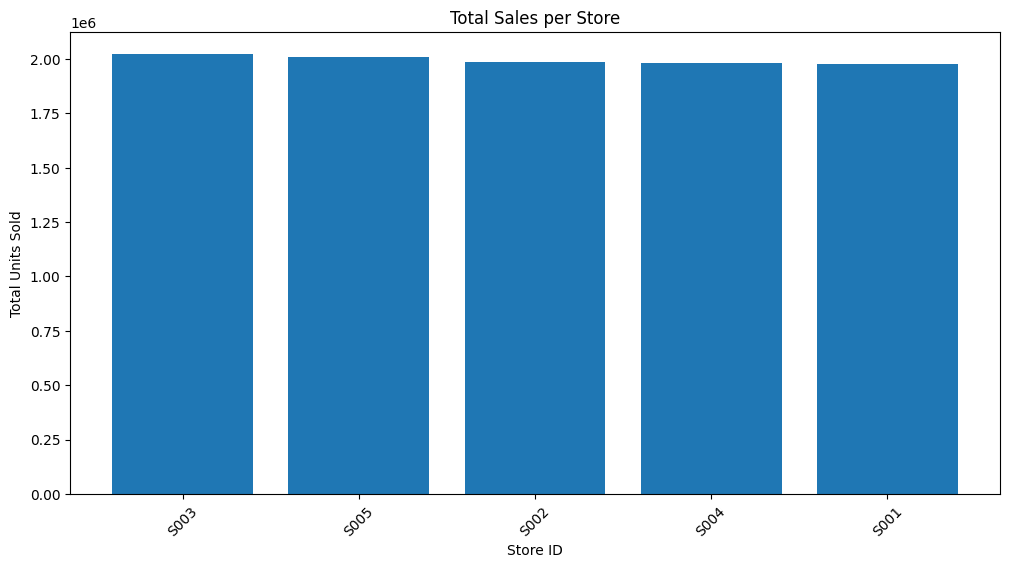

In [23]:
# Visualize Store Performance
plt.figure(figsize=(12,6))
plt.bar(store_sales['Store ID'], store_sales['Units Sold'])
plt.xlabel('Store ID')
plt.ylabel('Total Units Sold')
plt.title('Total Sales per Store')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Average Daily Units Sold per Store
store_avg_sales = (
    data
    .groupby('Store ID')['Units Sold']
    .mean()
    .reset_index()
    .sort_values(by='Units Sold', ascending=False)
)

store_avg_sales


,Store ID,Units Sold
2,S003,138.363475
4,S005,137.496580
1,S002,135.962038
3,S004,135.378112
0,S001,135.092544


### Question: Which products are high, medium, and low-demand?
We want to know:
- Which products sell a lot (high demand)
- Which products sell moderately
- Which products sell very little (slow movers)

This helps business decide:
- Which products need frequent replenishment
- Which products need controlled inventory

In [25]:
# Total Demand per Product
product_sales = (
    data
    .groupby('Product ID')['Units Sold']
    .sum()
    .reset_index()
    .sort_values(by='Units Sold', ascending=False)
)

product_sales


,Product ID,Units Sold
15,P0016,508372
19,P0020,507753
14,P0015,507298
13,P0014,507175
4,P0005,503698
8,P0009,502140
12,P0013,500976
16,P0017,500510
6,P0007,499267
10,P0011,499260


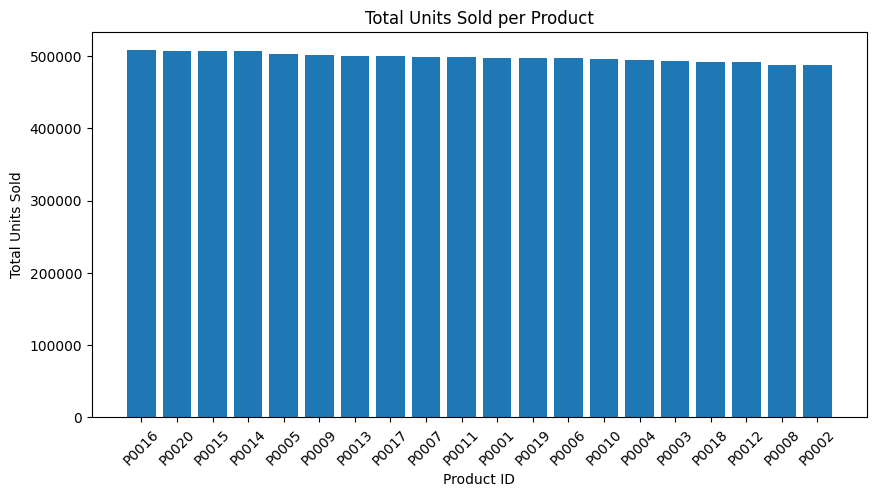

In [26]:
plt.figure(figsize=(10,5))
plt.bar(product_sales['Product ID'], product_sales['Units Sold'])
plt.xlabel('Product ID')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Product')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Demand Segmentation Using Quantiles
product_sales['Demand Segment'] = pd.qcut(
    product_sales['Units Sold'],
    q=3,
    labels=['Low Demand', 'Medium Demand', 'High Demand']
)

product_sales['Demand Segment'].value_counts()


Demand Segment
Low Demand       7
High Demand      7
Medium Demand    6
Name: count, dtype: int64

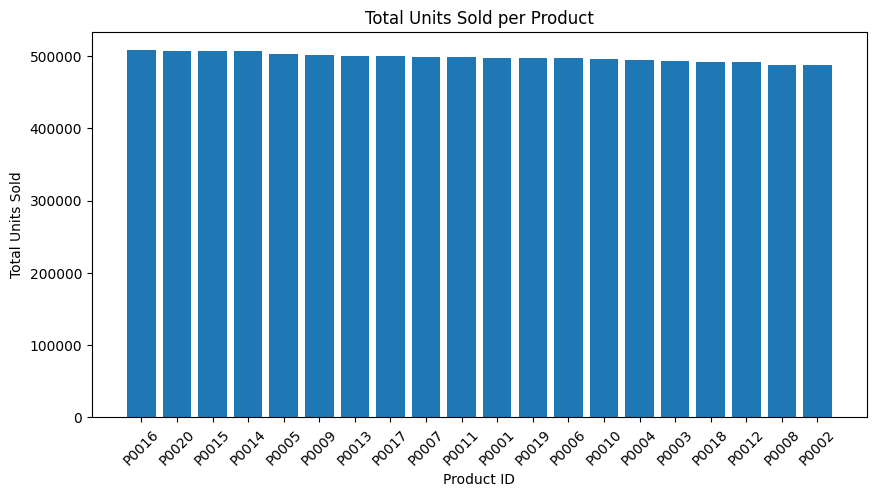

In [28]:
# Total units sold per product.
plt.figure(figsize=(10,5))
plt.bar(product_sales['Product ID'], product_sales['Units Sold'])
plt.xlabel('Product ID')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Product')
plt.xticks(rotation=45)
plt.show()


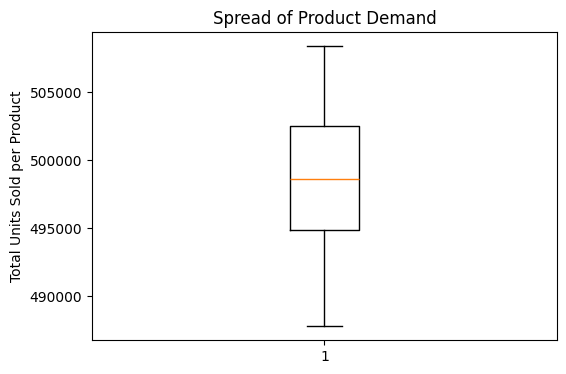

In [29]:
plt.figure(figsize=(6,4))
plt.boxplot(product_sales['Units Sold'])
plt.ylabel('Total Units Sold per Product')
plt.title('Spread of Product Demand')
plt.show()


### Question: Does product demand vary across stores?
We want to see:
- Does the same product sell differently in different stores?
- Are some products store-specific best sellers?
- Can we apply the same inventory rule for a product across all stores?

In [30]:
# Units Sold per Product per Store (Store × Product Demand)
store_product_sales = (
    data
    .groupby(['Store ID', 'Product ID'])['Units Sold']
    .sum()
    .reset_index()
)

store_product_sales.head()

,Store ID,Product ID,Units Sold
0,S001,P0001,100262
1,S001,P0002,95689
2,S001,P0003,103313
3,S001,P0004,102876
4,S001,P0005,97368


In [31]:
pivot_table = store_product_sales.pivot(
    index='Product ID',
    columns='Store ID',
    values='Units Sold'
)

pivot_table


Store ID,S001,S002,S003,S004,S005
Product ID,,,,,
P0001,100262,105999,94620,101270,95801
P0002,95689,94223,104346,95358,98176
P0003,103313,97227,92626,94436,105667
P0004,102876,101190,96687,95814,98836
P0005,97368,96910,105408,100309,103703
P0006,95529,97418,102068,103147,98868
P0007,100697,100601,101464,95307,101198
P0008,100217,94225,97864,98371,97859
P0009,96138,105376,102678,98390,99558


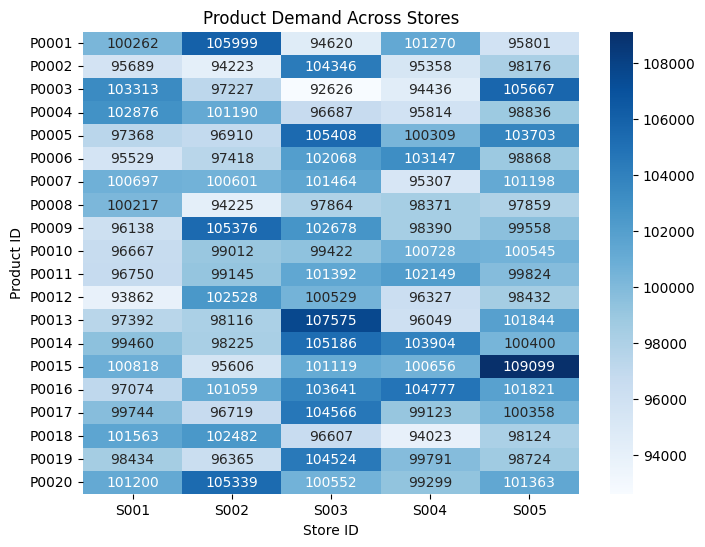

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title('Product Demand Across Stores')
plt.ylabel('Product ID')
plt.xlabel('Store ID')
plt.show()


INSIGHT: Product-level analysis across stores shows clear variation in demand for the same product across different store locations. Certain products perform significantly better in specific stores, while others show relatively consistent demand. This indicates that inventory planning and replenishment strategies should be tailored at the store–product level rather than applying uniform rules across all stores.

### Question: How is demand trending over time?
We want to see:
- Is demand increasing, decreasing, or stable over time?
- Are there ups and downs?
- Is there a pattern across dates?

This helps decide:
- Whether forecasting is needed
- What kind of time-series behavior exists

In [33]:
# Aggregate Demand Over Time (Daily Total Demand)
daily_sales = (
    data
    .groupby('Date')['Units Sold']
    .sum()
    .reset_index()
)

daily_sales.head()


,Date,Units Sold
0,2022-01-01,14230
1,2022-01-02,13367
2,2022-01-03,13781
3,2022-01-04,14181
4,2022-01-05,12550


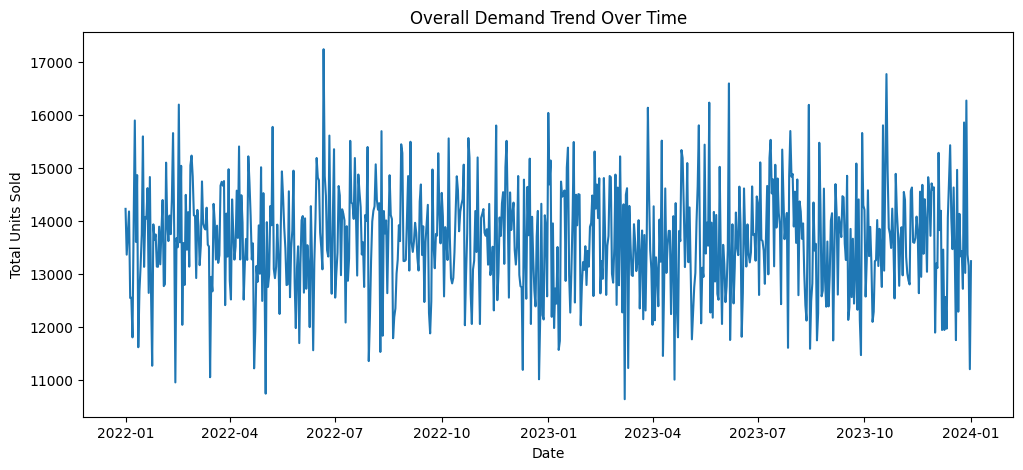

In [34]:
# Demand Trend Over Time
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Overall Demand Trend Over Time')
plt.show()


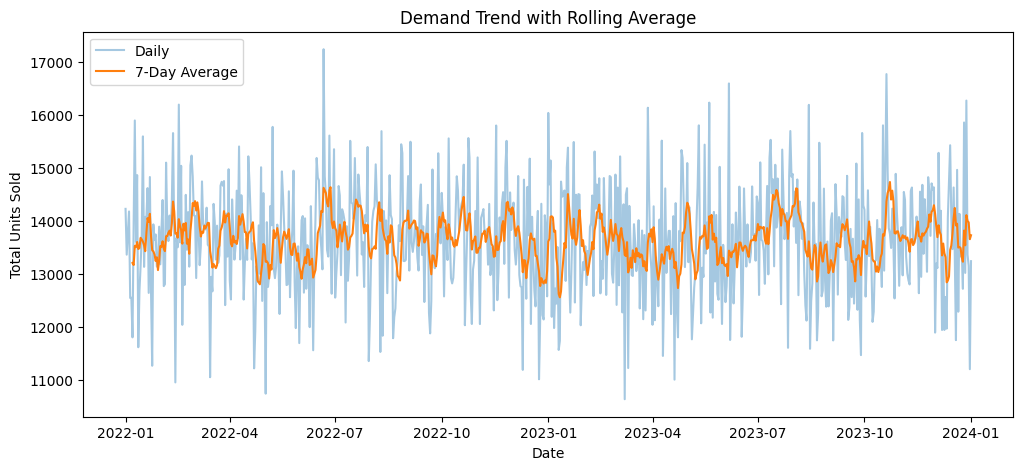

In [35]:
# Day Rolling Average
daily_sales['rolling_7'] = daily_sales['Units Sold'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'], alpha=0.4, label='Daily')
plt.plot(daily_sales['Date'], daily_sales['rolling_7'], label='7-Day Average')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Demand Trend with Rolling Average')
plt.legend()
plt.show()


### Question: Are there seasonal or monthly demand patterns?
We want to know:
- Does demand repeat every month / season?
- Are some months consistently high or low?
- Is there a seasonal cycle in sales?

In [36]:
# Extract Time-Based Features (Extract Month & Year)
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [37]:
# Average Monthly Demand
monthly_sales = (
    data
    .groupby('Month')['Units Sold']
    .mean()
    .reset_index()
)

monthly_sales


,Month,Units Sold
0,1,135.910476
1,2,138.426429
2,3,135.923387
3,4,134.784667
4,5,134.482742
5,6,136.856167
6,7,139.443065
7,8,135.716774
8,9,136.170333
9,10,137.523548


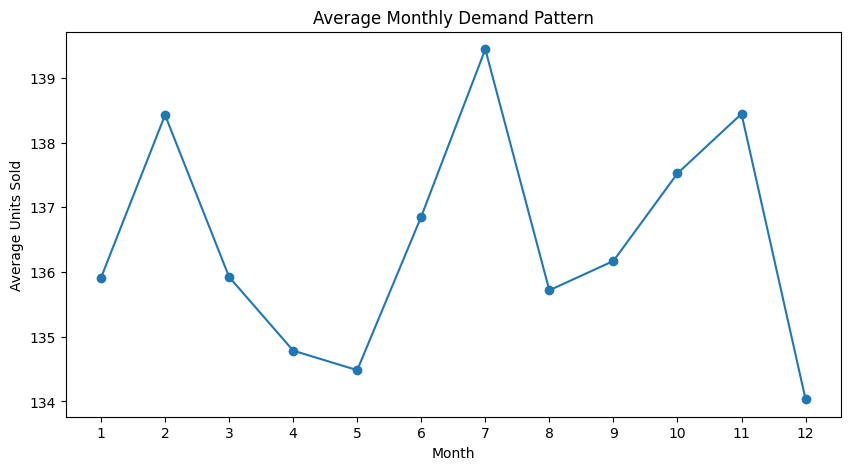

In [38]:
# Monthly Demand Pattern
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['Units Sold'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Units Sold')
plt.title('Average Monthly Demand Pattern')
plt.xticks(range(1,13))
plt.show()


In [39]:
# Seasonal Demand
seasonal_sales = (
    data
    .groupby('Seasonality')['Units Sold']
    .mean()
    .reset_index()
)

seasonal_sales


,Seasonality,Units Sold
0,Autumn,137.774419
1,Spring,135.836436
2,Summer,135.409342
3,Winter,136.822860


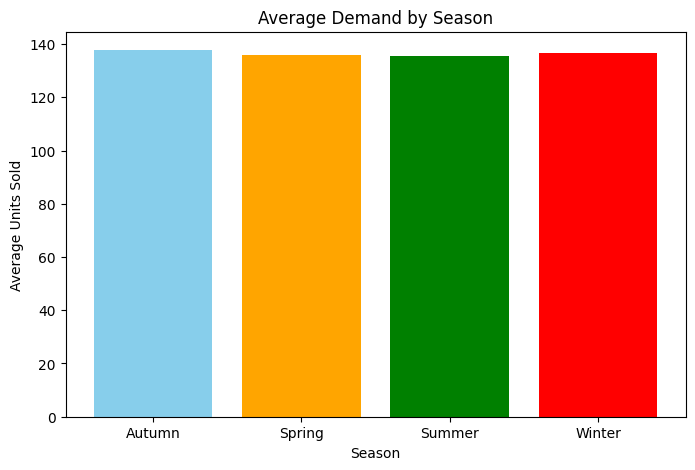

In [40]:
colors = ['skyblue', 'orange', 'green', 'red']

plt.figure(figsize=(8,5))
plt.bar(seasonal_sales['Seasonality'], seasonal_sales['Units Sold'],color=colors)
plt.xlabel('Season')
plt.ylabel('Average Units Sold')
plt.title('Average Demand by Season')
plt.show()

### Question: Which products have stable demand and which are highly unpredictable?
We want to know:
- Which products sell consistently (stable)
- Which products have large ups and downs (volatile)

In [41]:
# Measure Demand Variability per Product
product_variability = (
    data
    .groupby('Product ID')['Units Sold']
    .agg(['mean', 'std'])
    .reset_index()
)

product_variability.head()


,Product ID,mean,std
0,P0001,136.238577,109.336580
1,P0002,133.458824,106.387766
2,P0003,134.957319,108.289034
3,P0004,135.541176,109.218776
4,P0005,137.810670,106.876839


In [42]:
# Coefficient of Variation (CV) 
product_variability['CV'] = (
    product_variability['std'] / product_variability['mean']
)

product_variability


,Product ID,mean,std,CV
0,P0001,136.238577,109.336580,0.802538
1,P0002,133.458824,106.387766,0.797158
2,P0003,134.957319,108.289034,0.802395
3,P0004,135.541176,109.218776,0.805798
4,P0005,137.810670,106.876839,0.775534
5,P0006,135.986320,108.745785,0.799682
6,P0007,136.598358,110.514513,0.809047
7,P0008,133.662380,108.683677,0.813121
8,P0009,137.384405,110.538356,0.804592
9,P0010,135.806840,109.711294,0.807848


In [43]:
# Categorize Products by Stability
def demand_stability(cv):
    if cv < 0.5:
        return 'Stable'
    elif cv < 1:
        return 'Moderate'
    else:
        return 'Highly Volatile'

product_variability['Demand Stability'] = product_variability['CV'].apply(demand_stability)

product_variability['Demand Stability'].value_counts()


Demand Stability
Moderate    20
Name: count, dtype: int64

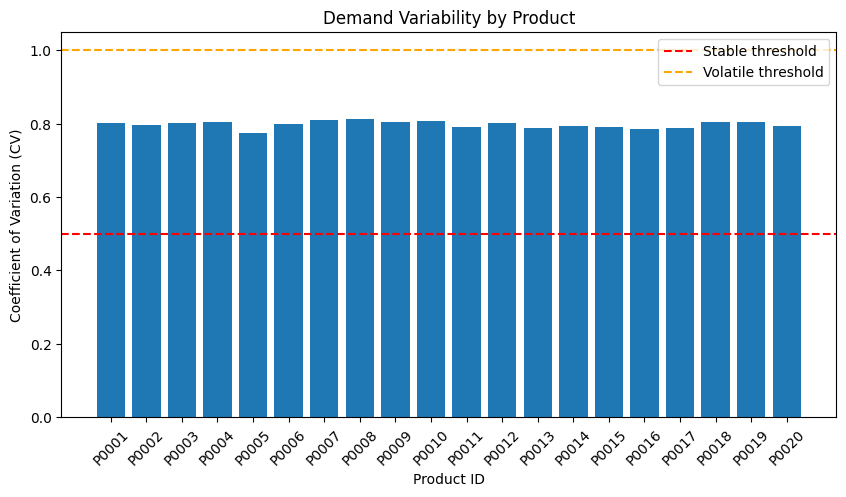

In [44]:
# Product Variability 
plt.figure(figsize=(10,5))
plt.bar(product_variability['Product ID'], product_variability['CV'])
plt.axhline(0.5, color='red', linestyle='--', label='Stable threshold')
plt.axhline(1.0, color='orange', linestyle='--', label='Volatile threshold')
plt.xlabel('Product ID')
plt.ylabel('Coefficient of Variation (CV)')
plt.title('Demand Variability by Product')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Question: How do promotions and discounts affect demand?
We want to know:
- Do products sell more during promotions?
- Does discounting increase demand?
- Does promotion also increase demand variability?

In [45]:
# Average Demand With vs Without Promotion
promo_effect = (
    data
    .groupby('Holiday/Promotion')['Units Sold']
    .mean()
    .reset_index()
)

promo_effect


,Holiday/Promotion,Units Sold
0,0,136.500966
1,1,136.415674


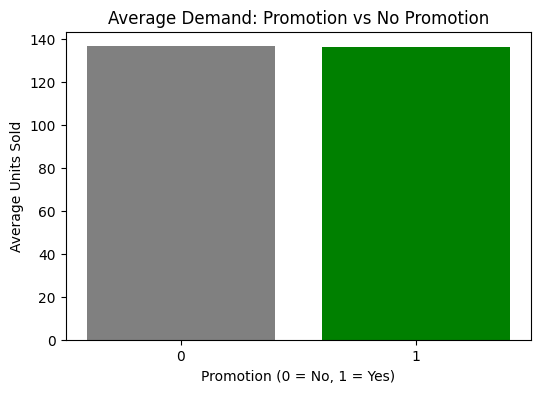

In [46]:
# Promotion vs Non-Promotion
plt.figure(figsize=(6,4))
plt.bar(
    promo_effect['Holiday/Promotion'].astype(str),
    promo_effect['Units Sold'],
    color=['gray', 'green']
)
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Units Sold')
plt.title('Average Demand: Promotion vs No Promotion')
plt.show()


In [47]:
# Discount vs Average Demand
discount_effect = (
    data
    .groupby('Discount')['Units Sold']
    .mean()
    .reset_index()
    .sort_values('Discount')
)

discount_effect


,Discount,Units Sold
0,0,135.701951
1,5,136.523062
2,10,136.764475
3,15,136.669379
4,20,136.637309


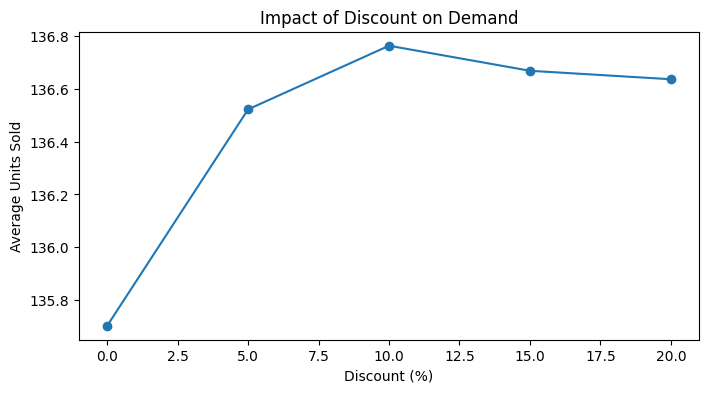

In [48]:
# Discount vs Demand
plt.figure(figsize=(8,4))
plt.plot(discount_effect['Discount'], discount_effect['Units Sold'], marker='o')
plt.xlabel('Discount (%)')
plt.ylabel('Average Units Sold')
plt.title('Impact of Discount on Demand')
plt.show()


#### Question: Does price change significantly impact demand?
We want to know:
- When price increases, does demand drop?
- When price decreases, does demand increase?
- Is price an important demand driver?

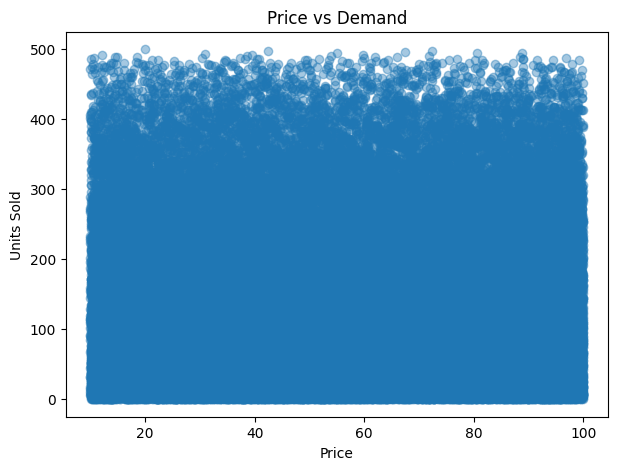

In [49]:
# Relationship Between Price and Demand (Price vs Units Sold)
plt.figure(figsize=(7,5))
plt.scatter(data['Price'], data['Units Sold'], alpha=0.4)
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Price vs Demand')
plt.show()



In [50]:
# Quantify Price–Demand Relationship
price_corr = data['Price'].corr(data['Units Sold'])
price_corr


np.float64(0.0011228235041894532)

In [51]:
comp_price_corr = data['Competitor Pricing'].corr(data['Units Sold'])
comp_price_corr


np.float64(0.0012955714894700326)

##  STEP 5: FEATURE ENGINEERING

In [52]:
# Define Target & Sort Data (Target variable = Units Sold)
# Ensure correct sorting
data = data.sort_values(['Store ID', 'Product ID', 'Date']).reset_index(drop=True)

In [53]:
# Create Time-Based Features 
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [54]:
# Create Lag Features (Lag features = past demand values)
for lag in [1, 7, 14]:
    data[f'lag_{lag}'] = data.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(lag)

In [55]:
# Create Rolling Statistics
data['rolling_7_mean'] = (
    data.groupby(['Store ID', 'Product ID'])['Units Sold']
    .shift(1).rolling(7).mean()
)

data['rolling_14_mean'] = (
    data.groupby(['Store ID', 'Product ID'])['Units Sold']
    .shift(1).rolling(14).mean()
)


In [56]:
# Encode Promotion & Discount Signals
data['is_promo'] = (data['Discount'] > 0).astype(int)


In [57]:
# Drop NA from lags
data = data.dropna().reset_index(drop=True)
data.head()

data_model = data.copy()

In [58]:
data[['Store ID', 'Product ID']].drop_duplicates().head(10)


,Store ID,Product ID
0,S001,P0001
717,S001,P0002
1434,S001,P0003
2151,S001,P0004
2868,S001,P0005
3585,S001,P0006
4302,S001,P0007
5019,S001,P0008
5736,S001,P0009
6453,S001,P0010


In [59]:
data.shape

(71700, 25)

## STEP 7 : MODELLING AND EVALUATION


In [60]:
# Create Time-Based Split
# Get the cutoff date
cutoff_date = data_model['Date'].quantile(0.8)

# Split the data
train_data = data_model[data_model['Date'] <= cutoff_date]
test_data  = data_model[data_model['Date'] > cutoff_date]

print(train_data.shape, test_data.shape)

(57400, 25) (14300, 25)


In [61]:
# Define Features (X) and Target (y)
target = 'Units Sold'

num_features = [
    'lag_1', 'lag_7', 'lag_14',
    'rolling_7_mean', 'rolling_14_mean',
    'Day', 'Week', 'Month', 'DayOfWeek',
    'Price', 'Discount', 'is_promo'
]

cat_features = [
    'Store ID', 'Product ID', 'Category',
    'Region', 'Seasonality', 'Weather Condition'
]


### Baseline Model
Baseline Rule:
**Tomorrow’s demand = yesterday’s demand**

In [62]:
from sklearn.metrics import mean_absolute_error

X_test_baseline = test_data[num_features + cat_features]
y_test = test_data[target]

baseline_pred = X_test_baseline['lag_1']
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("Baseline MAE:", baseline_mae)

Baseline MAE: 119.71874125874126


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_test_baseline = test_data[num_features + cat_features]
y_test = test_data[target]

baseline_pred = X_test_baseline['lag_1']

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print("Baseline Model Performance:")
print("MAE:", baseline_mae)
print("RMSE:", baseline_rmse)

Baseline Model Performance:
MAE: 119.71874125874126
RMSE: 153.39241189828144


In [65]:
# -----------------------------
# SARIMA Statistical Model
# -----------------------------

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Filter for one store and product
ts_data = data[(data["Store ID"] == "S001") & (data["Product ID"] == "P0001")]

# Step 2: Sort by date
ts_data["Date"] = pd.to_datetime(ts_data["Date"])
ts_data = ts_data.sort_values("Date")

# Step 3: Set date as index
ts_data.set_index("Date", inplace=True)

# Step 4: Select target
y = ts_data["Units Sold"]

# Step 5: Train-test split (time-based)
train_size = int(len(y) * 0.8)
y_train_ts = y.iloc[:train_size]
y_test_ts = y.iloc[train_size:]

# Step 6: Fit SARIMA model
sarima_model = SARIMAX(
    y_train_ts,
    order=(1,1,1),
    seasonal_order=(1,1,1,7)  # weekly seasonality
)

sarima_result = sarima_model.fit(disp=False)

# Step 7: Forecast
sarima_pred = sarima_result.forecast(steps=len(y_test_ts))

# Step 8: Evaluate
sarima_mae = mean_absolute_error(y_test_ts, sarima_pred)
sarima_rmse = np.sqrt(mean_squared_error(y_test_ts, sarima_pred))

print("SARIMA Performance:")
print("MAE:", sarima_mae)
print("RMSE:", sarima_rmse)


C:\Users\irale\AppData\Local\Temp\ipykernel_29048\2835985428.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data["Date"] = pd.to_datetime(ts_data["Date"])
C:\Users\irale\Downloads\Retail Demand Forecasting sand Inventory Optimization\retail\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\irale\Downloads\Retail Demand Forecasting sand Inventory Optimization\retail\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA Performance:
MAE: 89.50430477421291
RMSE: 107.1410680488042


### ML Forecasting Model

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

X_train = train_data[num_features + cat_features]
y_train = train_data[target]

X_test  = test_data[num_features + cat_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_model)
])

pipeline.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_pred = pipeline.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest Performance:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)


Random Forest Performance:
MAE: 89.0424430687089
RMSE: 108.42710680846618


In [72]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Lag-1 Baseline", "SARIMA", "Random Forest"],
    "MAE": [baseline_mae, sarima_mae, rf_mae],
    "RMSE": [baseline_rmse, sarima_rmse, rf_rmse]
})

comparison_df


,Model,MAE,RMSE
0,Lag-1 Baseline,119.718741,153.392412
1,SARIMA,89.504305,107.141068
2,Random Forest,89.042443,108.427107
3,Gradient Boosting,89.036106,108.549999


In [73]:
# FORECAST-BASED INVENTORY OPTIMIZATION
test_data = test_data.copy()
test_data['Forecast'] = rf_pred


## Step 8: INVENTORY OPTIMIZATION

Key Inventory Concepts (You MUST know these)
1️⃣ Average Demand (D)

Expected daily demand
→ Use forecasted demand or historical mean

2️⃣ Demand Variability (σ)

How much demand fluctuates
→ Use standard deviation

3️⃣ Lead Time (L)

Time taken to replenish stock
→ Assume constant (e.g., 7 days) if not given

4️⃣ Service Level (Z)

Desired probability of no stockout

Common values:

Service Level	Z-Score
90%	1.28
95%	1.65
99%	2.33

Decide Optimization Level (Important Decision)

We will optimize at:

👉 Store × Product level

Why?

Demand varies by product

Demand varies by store

This is the most realistic level

In [74]:
inventory_stats = (
    test_data
    .groupby(['Store ID', 'Product ID'])['Forecast']
    .agg(['mean', 'std'])
    .reset_index()
)


In [75]:
# Demand stats from forecast
inventory_stats = (
    test_data
    .groupby(['Store ID', 'Product ID'])['Forecast']
    .agg(['mean', 'std'])
    .reset_index()
)


In [76]:
# SAFETY STOCK & ROP
lead_time = 7
service_level = 1.65

inventory_stats['Safety Stock'] = (
    service_level * inventory_stats['std'] * (lead_time ** 0.5)
)

inventory_stats['Reorder Point'] = (
    inventory_stats['mean'] * lead_time +
    inventory_stats['Safety Stock']
)


In [77]:
# CURRENT INVENTORY & ORDER DECISION
current_inventory = (
    test_data
    .sort_values('Date')
    .groupby(['Store ID', 'Product ID'])
    .tail(1)[['Store ID', 'Product ID', 'Inventory Level']]
    .reset_index(drop=True)
)

inventory_plan = inventory_stats.merge(
    current_inventory,
    on=['Store ID', 'Product ID'],
    how='left'
)

inventory_plan['Order Quantity'] = (
    inventory_plan['Reorder Point'] -
    inventory_plan['Inventory Level']
)

inventory_plan.loc[inventory_plan['Order Quantity'] < 0, 'Order Quantity'] = 0

inventory_plan.head(20)


,Store ID,Product ID,mean,std,Safety Stock,Reorder Point,Inventory Level,Order Quantity
0,S001,P0001,137.488394,5.852802,25.550344,987.969103,223,764.969103
1,S001,P0002,136.222991,6.105718,26.654449,980.215385,217,763.215385
2,S001,P0003,136.903942,6.373063,27.821540,986.149136,69,917.149136
3,S001,P0004,138.852704,7.843184,34.239338,1006.208263,338,668.208263
4,S001,P0005,137.104994,5.491835,23.974548,983.709509,471,512.709509
5,S001,P0006,136.156132,5.476140,23.906031,976.998956,305,671.998956
6,S001,P0007,136.267457,6.526582,28.491727,982.363925,256,726.363925
7,S001,P0008,136.822307,8.530657,37.240495,994.996644,315,679.996644
8,S001,P0009,136.732910,5.225438,22.811594,979.941966,167,812.941966
9,S001,P0010,136.274537,5.936114,25.914044,979.835805,167,812.835805
